# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

[0.78929773 0.4940894  0.26290382]
[[0.38811766 0.4917253  0.6229909  0.78929773 1.        ]
 [0.05959669 0.12061924 0.24412433 0.4940894  1.        ]
 [0.00477736 0.0181715  0.06911842 0.26290382 1.        ]]

[[1.         0.78929773 0.6229909  0.4917253  0.38811766]
 [1.         0.4940894  0.24412433 0.12061924 0.05959669]
 [1.         0.26290382 0.06911842 0.0181715  0.00477736]]


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
A,b = main.spare_matrix_Abt(50,12)
A_2,b_2 = main.square_from_rectan(A,b)
x_1 = np.linalg.solve(A_2,b_2)  #1
x_2 = np.linalg.lstsq(A,b,2)[0]  #2
q,r = np.linalg.qr(A)
x_3 = sp.linalg.solve_triangular(r,np.transpose(q)@b)  #3
U,s,V=np.linalg.svd(A,full_matrices=False)
S=np.diag(s)
x_4=V.T@np.linalg.solve(S,U.T@b)  #4

#print(x_1)
#print(x_2)
#print(x_3)
#print(x_4)

def metoda_Square_From_Rectan():
    A_2,b_2 = main.square_from_rectan(A,b)
    x_1 = np.linalg.solve(A_2,b_2)
    return x_1

def metoda_QR():
    q,r = np.linalg.qr(A)
    x_3 = sp.linalg.solve_triangular(r,np.transpose(q)@b)
    return x_3

def metoda_SVD():
    U,s,V=np.linalg.svd(A,full_matrices=False)
    S=np.diag(s)
    x_4=V.T@np.linalg.solve(S,U.T@b)
    return x_4
print(20*'-','Badanie wydajności metod',20*'-')
for i in [metoda_Square_From_Rectan, metoda_QR, metoda_SVD]:
    print('Metoda: ',i)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o i()
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit i()
    print('Otrzymany wynik:')
    print(i())
    print('\n')
print('Metoda : np.linalg.lstsq')
print('TimingL')
saved_timing = %timeit -r 5 -n 10 -o np.linalg.lstsq(A,b,2)[0]
saved_timing.average   # średni czas próby
saved_timing.stdev     # odchylenie standardowe
print('Memory usage: ')
%memit np.linalg.lstsq(A,b,2)[0]
print('Otrzymany wynik:')
print(x_2)
print('\n')


print(20*'-','Badanie jakości metod',20*'-')

print("Metoda : Square_From_Rectan")
print("Wartość normy residuum: {0}".format(main.residual_norm(A,x_1,b)))
print('\n')

print("Metoda : lstsq")
print("Wartość normy residuum: {0}".format(main.residual_norm(A,x_2,b)))
print('\n')

print("Metoda : QR")
print("Wartość normy residuum: {0}".format(main.residual_norm(A,x_3,b)))
print('\n')

print("Metoda : SVD")
print("Wartość normy residuum: {0}".format(main.residual_norm(A,x_4,b)))
print('\n')




-------------------- Badanie wydajności metod --------------------
Metoda:  <function metoda_Square_From_Rectan at 0x00000234016C55E0>
Timing: 
The slowest run took 5.67 times longer than the fastest. This could mean that an intermediate result is being cached.
48.7 µs ± 38.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 97.58 MiB, increment: 0.23 MiB
Otrzymany wynik:
[ 9.99999974e-01  7.52807186e-06 -8.00028184e+00  4.13166831e-03
  1.06352339e+01  1.40965497e-01 -6.08701982e+00  7.32059132e-01
  7.37946768e-01  7.10592083e-01 -6.68480496e-01  1.41202005e-01]


Metoda:  <function metoda_QR at 0x000002341FD4C5E0>
Timing: 
113 µs ± 9.31 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 97.60 MiB, increment: 0.01 MiB
Otrzymany wynik:
[ 1.00000000e+00 -4.22743382e-07 -7.99998124e+00 -3.18763322e-04
  1.06694308e+01 -1.38202901e-02 -5.64707562e+00 -7.53160326e-02
  1.69360697e+00  6.03210277e-03 -3.74241701e-01  8.8040

Najszybszą metodą okazała się metoda przekształcenia macierzy kwadratowej w macierz prostokątną a więc ta, którą implementowaliśmy na tych zajęciach. Następne 3 metody są wolniejsze a ich czasy są zbliżone do siebie. Jednak to,że nasza metoda jest najszybsza wcale nie oznacza, że jest najlepsza ponieważ jej norma jest ok. 100 razy większa od norm pozostałych metod, co oznacza że nie jest ona nie dokładna. Gdy porównamy wektory wyników widoczne na ekranie, gołym okiem widać że wartości dla wektora z naszej meotdy się różnią. Prawdopodobnie dzieje się tak dla tego, że w implementacji naszej funkcji operujemy na małych liczbach zbliżonych do siebie, co może powodować potencjalne błędy numeryczne. Gdybym musiał użyć jakiejś metody to wybrałbym np.linalg.lstsq ponieważ jest dokładna i najszybsza z metod, które zapewniają poprawne wyniki.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [3]:
x1 = np.random.normal(0,1,(100,1))
x2 = np.random.normal(0,1,(100,1))
ones = np.ones((100,1))
#print(np.ones((100,1)))
y = 2 + x1 - 0.5*x2 + np.random.normal(0,1,(100,1))
#print(y)

A_ones_x_1 = np.concatenate((ones,x1),1)
A_ones_x2 = np.concatenate((ones,x2),1)
A_ones_x1_x2 = np.concatenate((ones,x1+x2),1)
A_ones_x2_x2 = np.concatenate((ones, x2 + x2), axis=1)



q,r=np.linalg.qr(A_ones_x_1)
beta1 = sp.linalg.solve_triangular(r,q.T@y)         #Obliczanie wspolczynnikow regresji liniowych z wykorzstaniem QR
                                                        #dla poszczegolnych macierzy
q,r=np.linalg.qr(A_ones_x2)
beta2 = sp.linalg.solve_triangular(r,q.T@y)

q,r=np.linalg.qr(A_ones_x1_x2)
beta3 = sp.linalg.solve_triangular(r,np.transpose(q) @ y)

q,r=np.linalg.qr(A_ones_x2_x2)
beta4 = sp.linalg.solve_triangular(r,np.transpose(q) @ y)



pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

Text(0.5, 0, 'x_2')

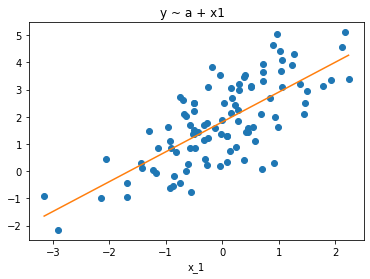

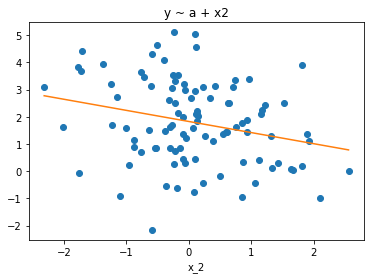

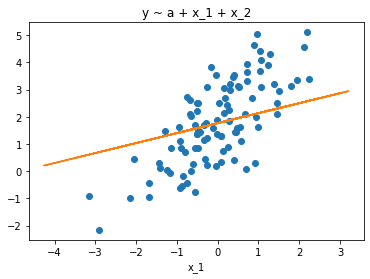

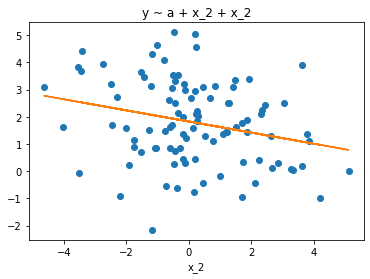

In [4]:


plt.figure()
plt.plot(x1,y,marker='o',linestyle='none')
plt.plot(pred1, beta1[0]+beta1[1]*pred1)
plt.title('y ~ a + x1  ')
plt.xlabel('x_1')

plt.figure()
plt.plot(x2,y,marker='o',linestyle='none')
plt.plot(pred2, beta2[0]+beta2[1]*pred2)
plt.title('y ~ a + x2')
plt.xlabel('x_2')

plt.figure()
plt.plot(x1,y,marker='o',linestyle='none')
plt.plot(x1+x2,A_ones_x1_x2 @ beta3)
plt.title('y ~ a + x_1 + x_2')
plt.xlabel('x_1')

plt.figure()
plt.plot(x2 + x2,y,'o')
plt.plot(x2+x2, A_ones_x2_x2 @ beta4)
plt.title('y ~ a + x_2 + x_2')
plt.xlabel('x_2')



Na tych laboratoriach rozszerzyliśmy poznane na wcześniejszych laboratoraich metody rozwiązywania układów z macierzą kwadratową na układy równań z macierzą prostokątną. Poznaliśmy dokładność oraz szybkośc wykonywania poszczególnych metod. Mieliśmy też okazję popracować z regresją liniową, która jest użytecznym narzędziem m.in w machine learningu.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)